In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib.lines import Line2D
df = pd.read_csv("shifted_female_to_male_distribution_evaluation_results.csv")





In [5]:
df

,experiment_name,model_type,model_name,test_a_accuracy,test_a_auc,test_a_recall,test_a_specificity,test_a_balanced_accuracy,shifted_pos_accuracy,shifted_pos_auc,...,cf_shifted_pos_accuracy,cf_shifted_pos_auc,cf_shifted_pos_recall,cf_shifted_pos_specificity,cf_shifted_pos_balanced_accuracy,cf_shifted_neg_accuracy,cf_shifted_neg_auc,cf_shifted_neg_recall,cf_shifted_neg_specificity,cf_shifted_neg_balanced_accuracy
0,Female_to_Male,resnet,resnet50_io_trained_on_female15,0.897339,0.808148,0.503333,0.910555,0.706944,0.904003,0.804054,...,0.887508,0.789601,0.513333,0.893784,0.703558,0.868818,0.788868,0.523333,0.891995,0.707664
1,Female_to_Male,densenet,densenet121_io_trained_on_female11,0.893444,0.798201,0.486667,0.907089,0.696878,0.900264,0.805709,...,0.885639,0.805093,0.540000,0.891436,0.715718,0.867351,0.793996,0.523333,0.890429,0.706881
2,Female_to_Male,vit,vit_b_16_io_trained_on_female5,0.912808,0.801428,0.433333,0.928891,0.681112,0.920497,0.791489,...,0.885419,0.768013,0.480000,0.892218,0.686109,0.860436,0.789278,0.526667,0.882826,0.704747
3,Female_to_Male,resnet,resnet_trained_on_F_split_on_Sex_seed_34_epoch_15,0.854608,0.801377,0.583333,0.863708,0.723520,0.858588,0.787545,...,0.869804,0.794664,0.546667,0.875224,0.710945,0.852682,0.788474,0.530000,0.874329,0.702165
4,Female_to_Male,densenet,densenet_trained_on_F_split_on_Sex_seed_34_epo...,0.908806,0.799994,0.443333,0.924419,0.683876,0.916648,0.797307,...,0.898285,0.795589,0.513333,0.904741,0.709037,0.874057,0.792237,0.486667,0.900045,0.693356
5,Female_to_Male,vit,vit_trained_on_F_split_on_Sex_seed_34_epoch_15,0.951861,0.798171,0.260000,0.975067,0.617534,0.962943,0.793087,...,0.963492,0.767262,0.253333,0.975403,0.614368,0.930847,0.770635,0.260000,0.975850,0.617925
6,Female_to_Male,resnet,resnet_trained_on_F_split_on_Sex_seed_35_epoch_15,0.871701,0.800978,0.523333,0.883386,0.703359,0.877282,0.795349,...,0.881130,0.799973,0.513333,0.887299,0.700316,0.866513,0.793781,0.516667,0.889982,0.703324
7,Female_to_Male,densenet,densenet_trained_on_F_split_on_Sex_seed_35_epo...,0.890848,0.796255,0.516667,0.903399,0.710033,0.896745,0.795083,...,0.874753,0.802203,0.533333,0.880479,0.706906,0.857293,0.799243,0.550000,0.877907,0.713953
8,Female_to_Male,vit,vit_trained_on_F_split_on_Sex_seed_35_epoch_15,0.955755,0.793971,0.220000,0.980434,0.600217,0.967561,0.780924,...,0.960743,0.761275,0.280000,0.972160,0.626080,0.928961,0.767382,0.303333,0.970930,0.637132


# Baseline: Classical Stress Testing

--- Average AUC by Model Type ---
model_type         DenseNet-121  ResNet-50  ViT-B/16
Baseline (IID)         0.803273   0.797193  0.797952
Gamma Correction       0.797157   0.782974  0.789142
Contrast Change        0.795282   0.791591  0.793931
Brightness Change      0.771150   0.772631  0.779818
Sharpness Change       0.799878   0.788217  0.792986
Gaussian Blur          0.803806   0.795215  0.788641

--- Average TPR_AT_10%_FPR by Model Type ---
model_type         DenseNet-121  ResNet-50  ViT-B/16
Baseline (IID)         0.501144   0.477498  0.463005
Gamma Correction       0.486651   0.443936  0.437834
Contrast Change        0.489703   0.440122  0.460717
Brightness Change      0.400458   0.402746  0.406560
Sharpness Change       0.498093   0.459191  0.452326
Gaussian Blur          0.500381   0.472159  0.435545


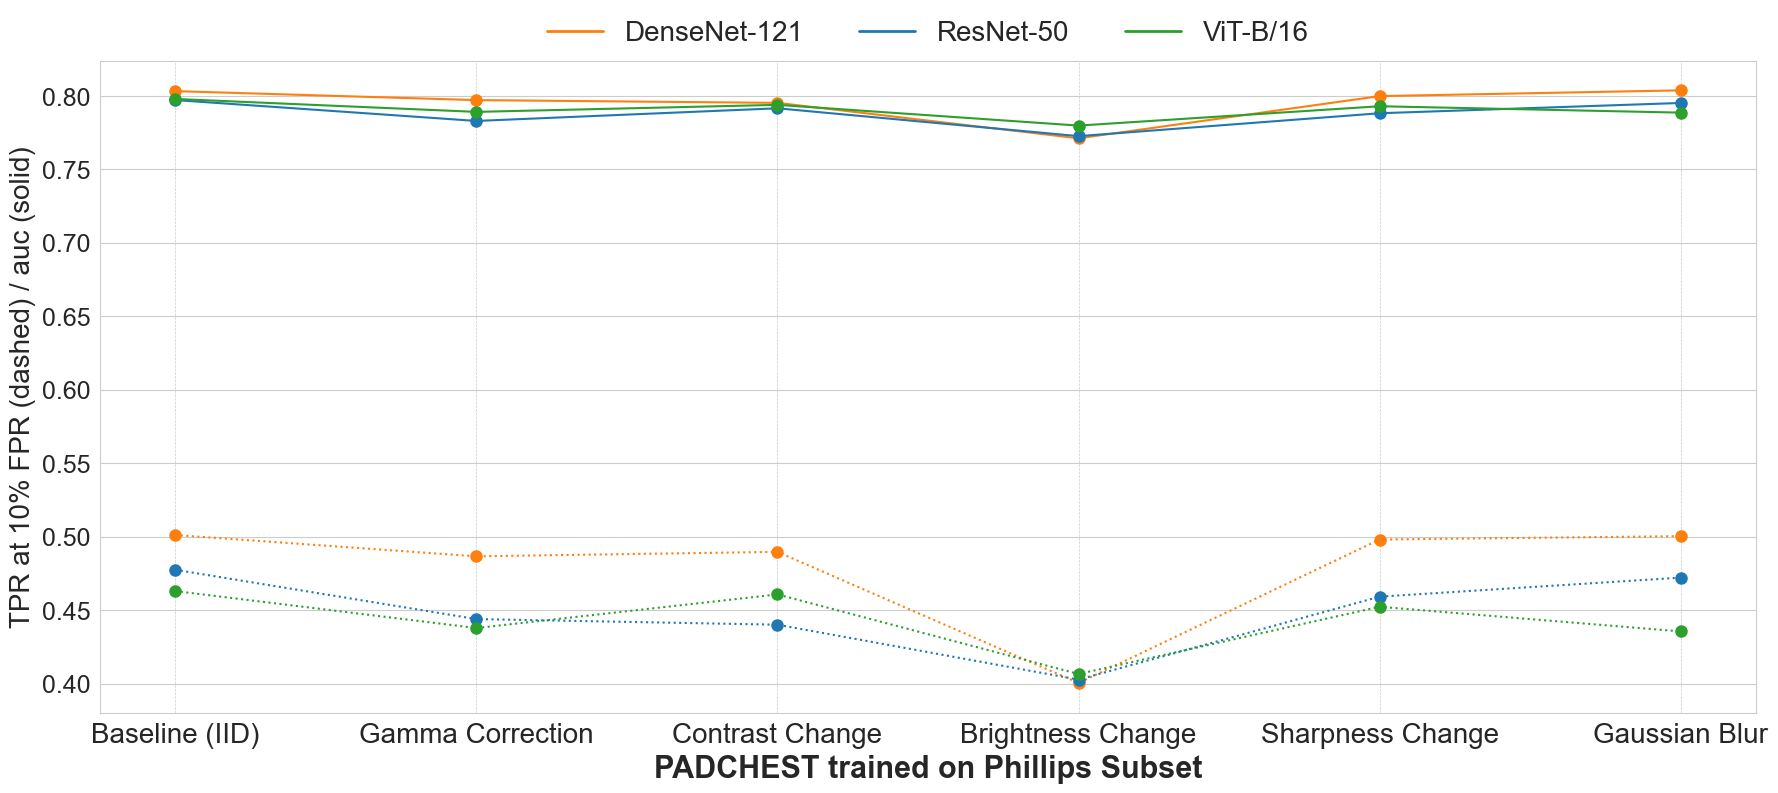

In [ ]:

def plot_model_performance(dataframe, primary_metric='auc', secondary_metric='accuracy', title = 'Padchest trained on Scanner Imaging'):
    """
    Calculates and plots average performance for a primary (solid line) and 
    secondary (dotted line) metric across different distribution shift conditions.
    """
  
    conditions = {
    'baseline': 'Baseline (IID)',
    'gamma': 'Gamma Correction',
    'contrast': 'Contrast Change',
    'brightness': 'Brightness Change',
    'sharpness': 'Sharpness Change',
    'blur': 'Gaussian Blur'
    }
    model_display_map = {
        'resnet': 'ResNet-50',
        'densenet': 'DenseNet-121',
        'vit': 'ViT-B/16'
    }

    # --- Data Preparation ---
    primary_cols = {f'{key}_{primary_metric}': name for key, name in conditions.items()}
    secondary_cols = {f'{key}_{secondary_metric}': name for key, name in conditions.items()}

   
    avg_primary = dataframe.groupby('model_type')[list(primary_cols.keys())].mean().T.rename(index=primary_cols, columns=model_display_map)
    avg_secondary = dataframe.groupby('model_type')[list(secondary_cols.keys())].mean().T.rename(index=secondary_cols, columns=model_display_map)

    print(f"--- Average {primary_metric.upper()} by Model Type ---")
    print(avg_primary)
    print(f"\n--- Average {secondary_metric.upper()} by Model Type ---")
    print(avg_secondary)

    # --- Plotting ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 8))
    
    colors = {'ResNet-50': 'C0', 'DenseNet-121': 'C1', 'ViT-B/16': 'C2'}

    for model_name in avg_primary.columns:
        color = colors.get(model_name, 'k')
        
      
        ax.plot(
            avg_primary.index,
            avg_primary[model_name],
            marker='o',
            linestyle='-',
            color=color,
            markersize=8,
        )
        
        # Plot Secondary Metric (e.g., Accuracy) with dotted line
        ax.plot(
            avg_secondary.index,
            avg_secondary[model_name],
            marker='o',
            linestyle=':',
            color=color,
            markersize=8,
        )
        
    # --- Formatting the Plot ---
    
    ax.set_ylabel('TPR at 10% FPR (dashed) / auc (solid)', fontsize=20)
    ax.set_xlabel(title, fontweight='bold', fontsize=22)
    
    ax.tick_params(axis='x', which='major', labelsize=20, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=18)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)

    # --- Custom Legend ---
    legend_elements = [Line2D([0], [0], color=colors[name], lw=2, label=name) for name in avg_primary.columns]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=20, frameon=False)
    
    fig.tight_layout()
    
    # Save the plot to a file
    plt.savefig(f"trained_on_male_stress_testing.pdf", bbox_inches='tight')
    plt.show()


# --- 3. Run the Analysis ---
plot_model_performance(df, primary_metric='auc', secondary_metric='tpr_at_10%_fpr', title = 'PADCHEST trained on Phillips Subset')


## Baseline stress test on Embed


CSV file loaded successfully.
--- Average AUC by Model Type ---
model_type      DenseNet-121  ResNet-50  ViT-B/16
Baseline (IID)      0.931441   0.928010  0.928947
Gamma               0.924577   0.921247  0.928708
Contrast            0.929037   0.924685  0.932904
Brightness          0.931053   0.925100  0.929497
Sharpness           0.931289   0.928062  0.928870
Blur                0.931028   0.927356  0.929571

--- Average TPR_AT_10_FPR by Model Type ---
model_type      DenseNet-121  ResNet-50  ViT-B/16
Baseline (IID)      0.789481   0.779319  0.790281
Gamma               0.768246   0.754625  0.783438
Contrast            0.781421   0.759582  0.809242
Brightness          0.792346   0.763308  0.794020
Sharpness           0.790198   0.778741  0.791150
Blur                0.792378   0.777216  0.790290

Styled plot saved successfully as 'embed_stress_testing_performance_styled.pdf' and .png


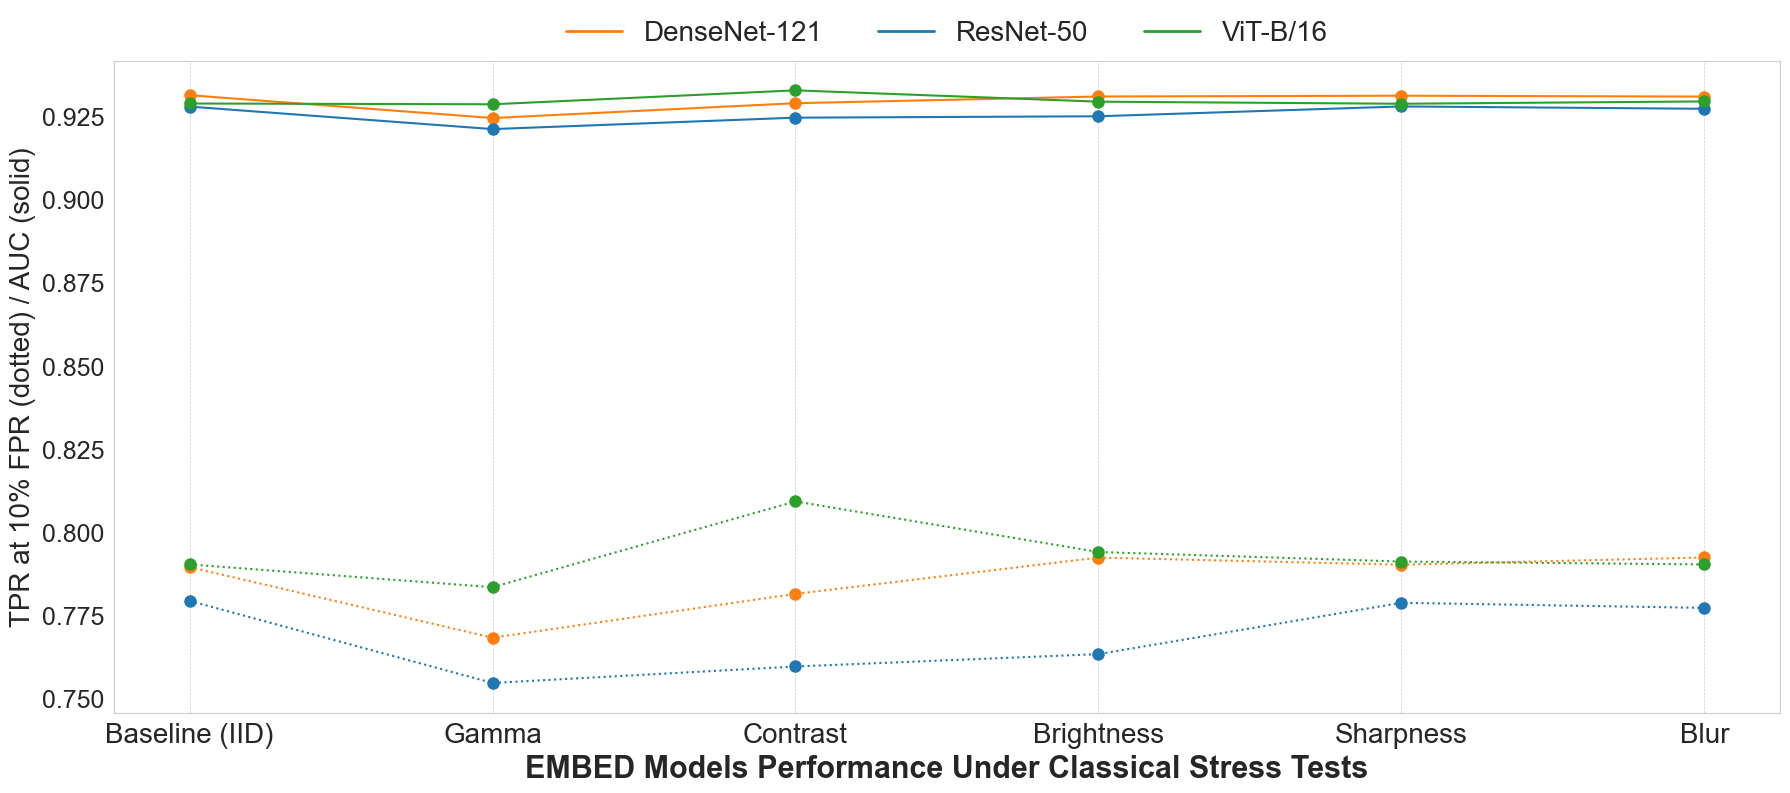

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def plot_model_performance_styled(dataframe, primary_metric='auc', secondary_metric='tpr_at_10_fpr', title = 'EMBED Models Performance Under Classical Stress Tests'):
    """
    Calculates and plots average performance in the user-specified style.
    A primary metric is shown with a solid line and a secondary metric with a dotted line.
    """
    # --- Mappings for Plotting ---
    conditions = {
        'test_a': 'Baseline (IID)',
        'stress_gamma': 'Gamma',
        'stress_contrast': 'Contrast',
        'stress_brightness': 'Brightness',
        'stress_sharpness': 'Sharpness',
        'stress_blur': 'Blur'
    }

    model_display_map = {
        'resnet': 'ResNet-50',
        'densenet': 'DenseNet-121',
        'vit': 'ViT-B/16'
    }

    # --- Data Preparation ---
    primary_cols = {f'{key}_{primary_metric}': name for key, name in conditions.items()}
    secondary_cols = {f'{key}_{secondary_metric}': name for key, name in conditions.items()}

    avg_primary = dataframe.groupby('model_type')[list(primary_cols.keys())].mean().T.rename(index=primary_cols, columns=model_display_map)
    avg_secondary = dataframe.groupby('model_type')[list(secondary_cols.keys())].mean().T.rename(index=secondary_cols, columns=model_display_map)

    print(f"--- Average {primary_metric.upper()} by Model Type ---")
    print(avg_primary)
    print(f"\n--- Average {secondary_metric.upper()} by Model Type ---")
    print(avg_secondary)

    # --- Plotting (User-Specified Style) ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 8))
    
    colors = {'ResNet-50': 'C0', 'DenseNet-121': 'C1', 'ViT-B/16': 'C2'}

    for model_name in avg_primary.columns:
        color = colors.get(model_name, 'k')
        
        ax.plot(
            avg_primary.index,
            avg_primary[model_name],
            marker='o',
            linestyle='-',
            color=color,
            markersize=8,
        )
        
        ax.plot(
            avg_secondary.index,
            avg_secondary[model_name],
            marker='o',
            linestyle=':',
            color=color,
            markersize=8,
        )
        
    # --- Formatting the Plot (User-Specified Style) ---
    ax.set_ylabel('TPR at 10% FPR (dotted) / AUC (solid)', fontsize=20)
    ax.set_xlabel(title, fontweight='bold', fontsize=22)
    
    ax.tick_params(axis='x', which='major', labelsize=20, rotation=0)
    ax.tick_params(axis='y', which='major', labelsize=18)
    
    # Grid with only vertical lines, as per the example
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)
    ax.grid(False, axis='y')

    # --- Custom Legend (User-Specified Style) ---
    legend_elements = [Line2D([0], [0], color=colors[name], lw=2, label=name) for name in avg_primary.columns]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=20, frameon=False)
    
    fig.tight_layout()
    
    plt.savefig("embed_stress_testing_performance.pdf", bbox_inches='tight')

    print("\nStyled plot saved successfully as 'embed_stress_testing_performance_styled.pdf' and .png")
    plt.show()


# --- Main Execution Block ---
if __name__ == "__main__":
    try:
        df = pd.read_csv('baseline_stress_test_embed.csv')
        print("CSV file loaded successfully.")
        
        plot_model_performance_styled(df, primary_metric='auc', secondary_metric='tpr_at_10_fpr')
        
    except FileNotFoundError:
        print("\nERROR: 'baseline_stress_test_embed.csv' not found.")
        print("Please run the data generation script first and ensure the output CSV is in the correct directory.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Counterfactual Stress Testing on PadChest

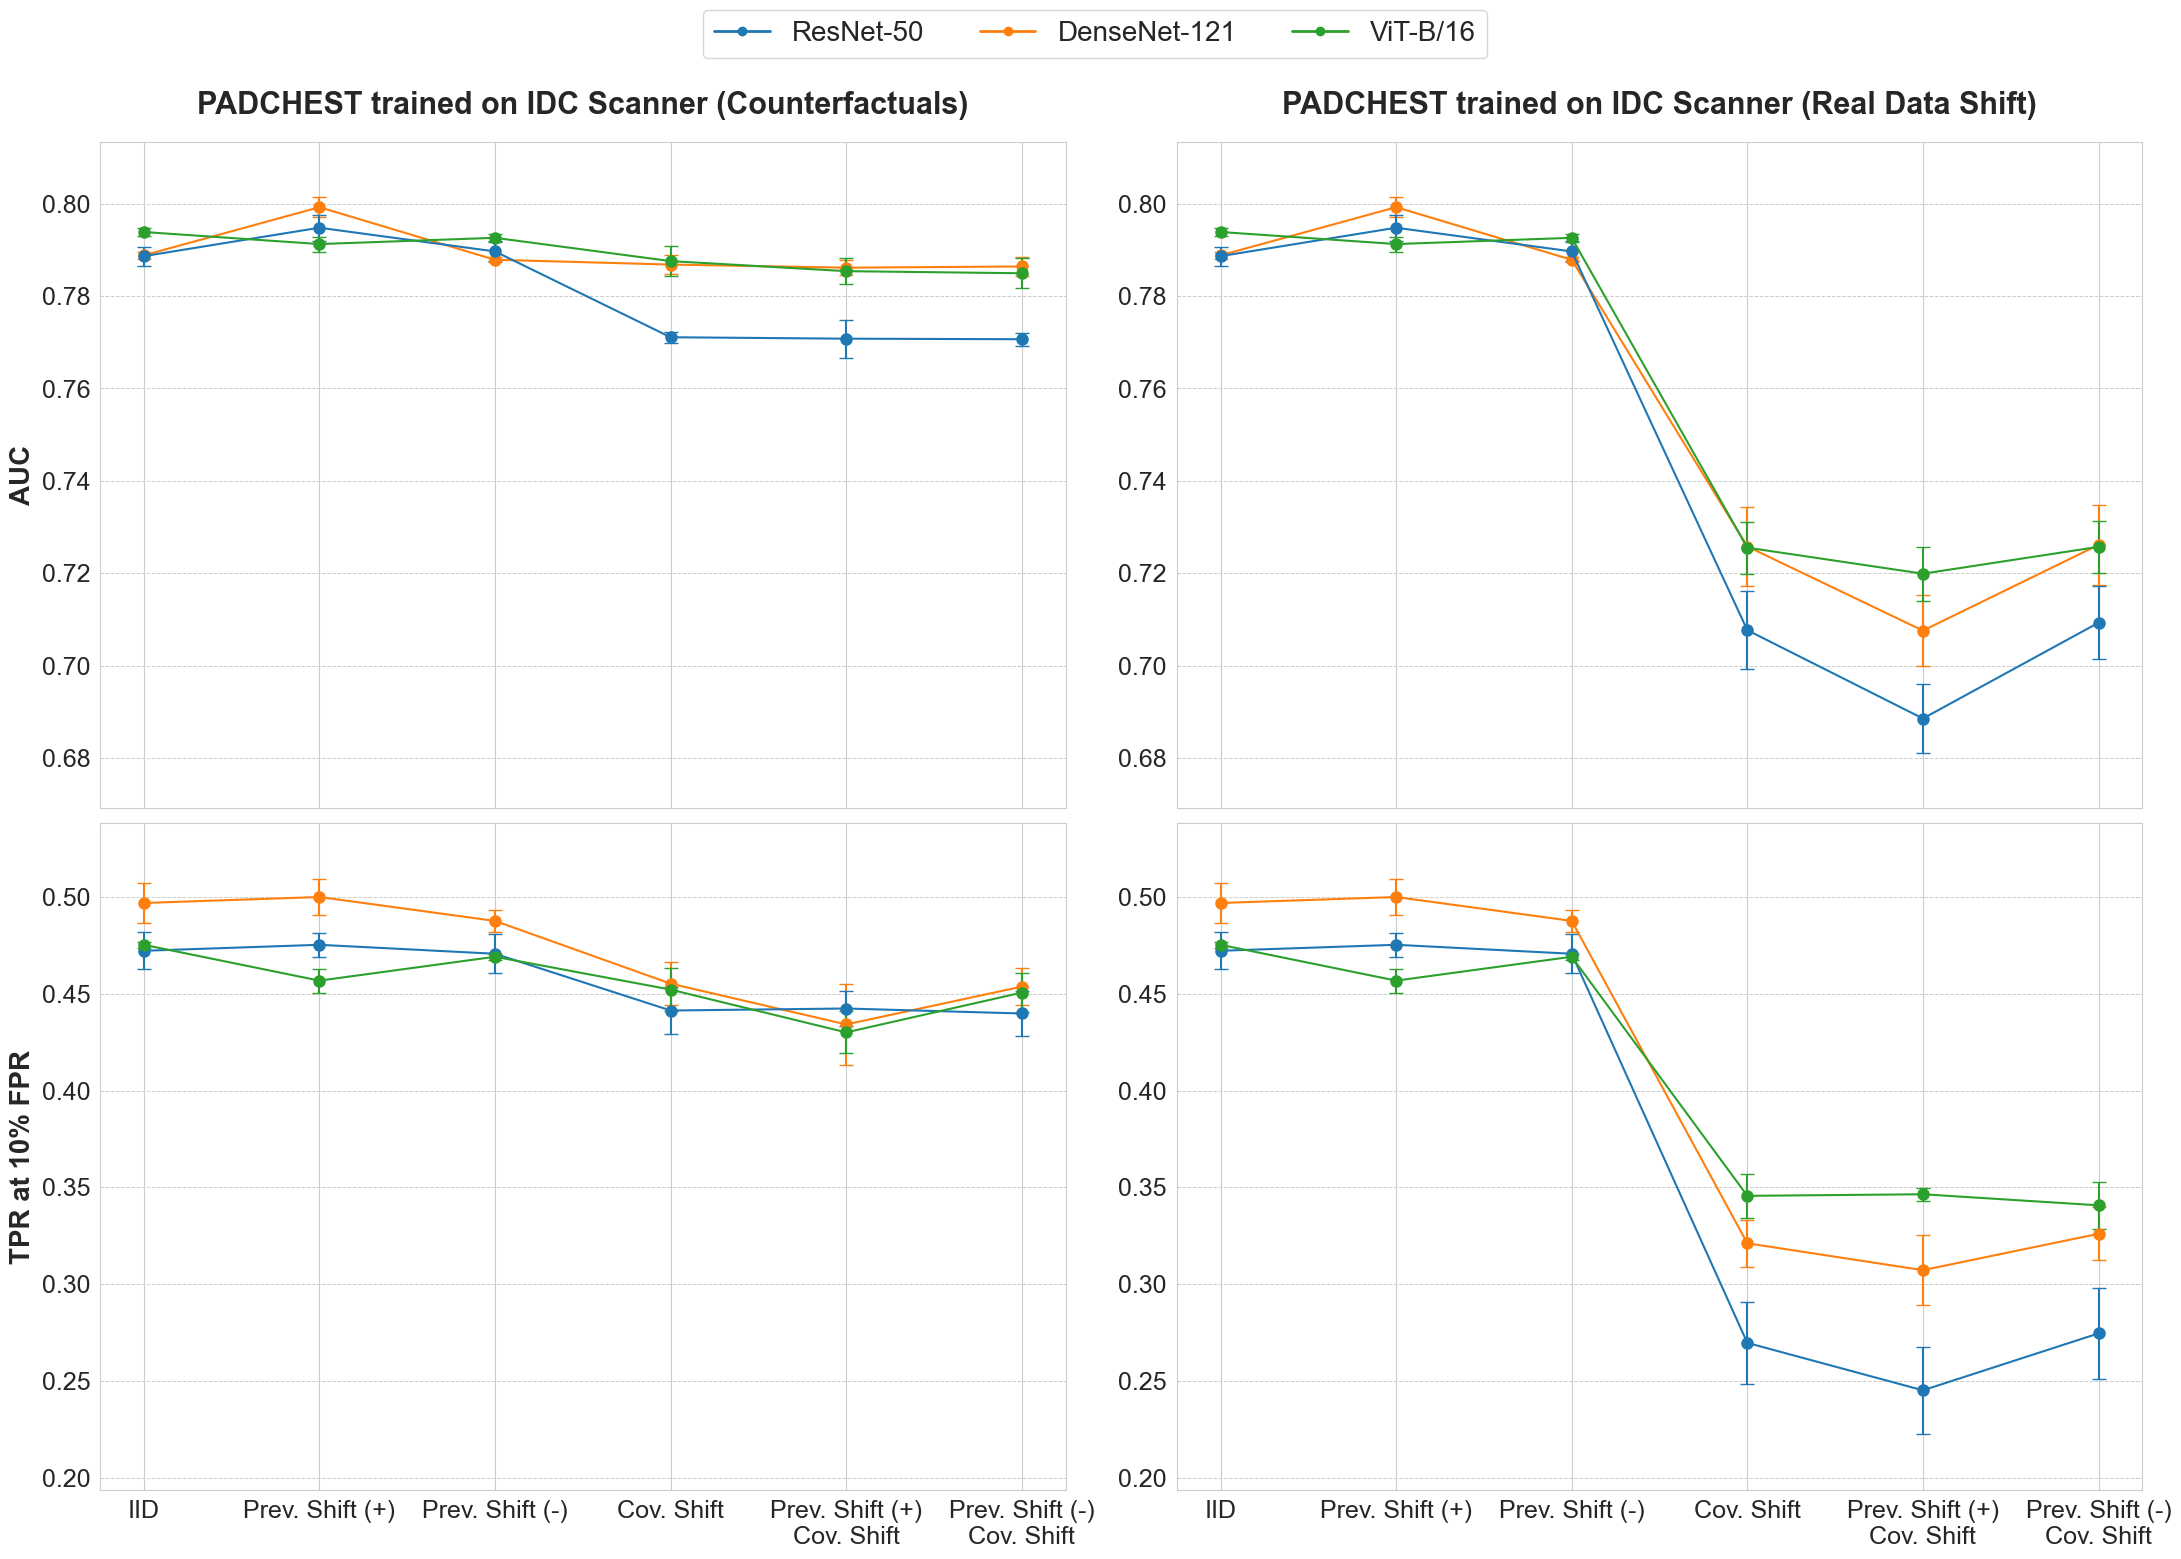

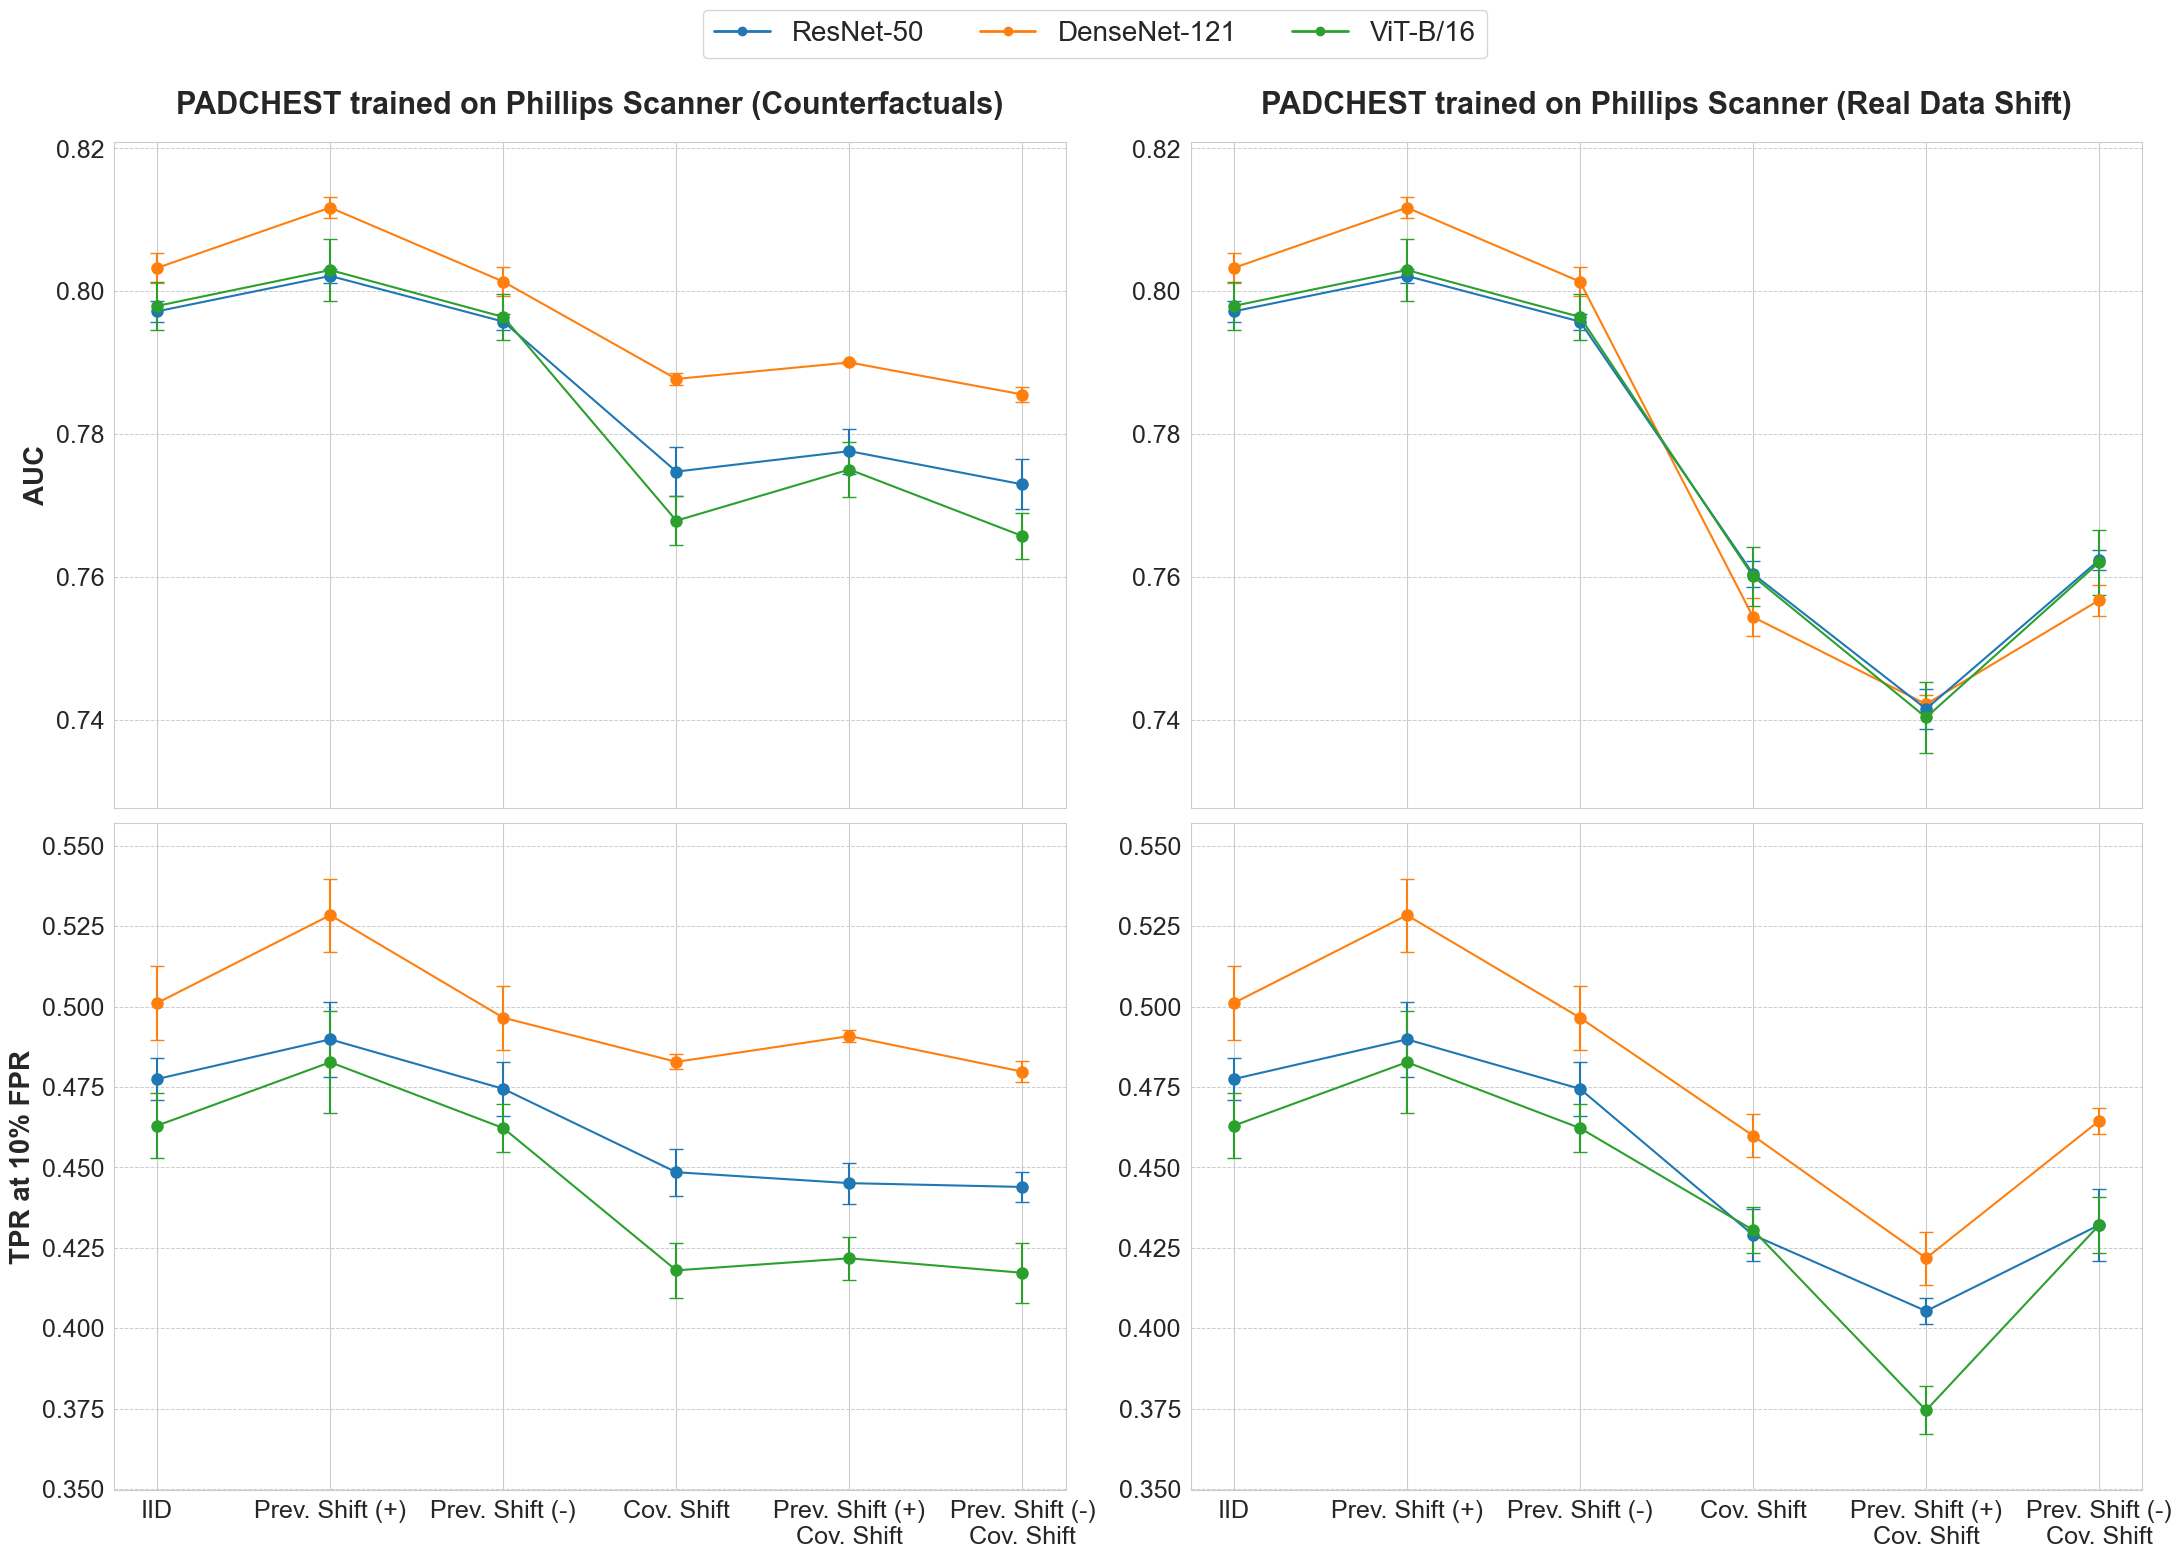

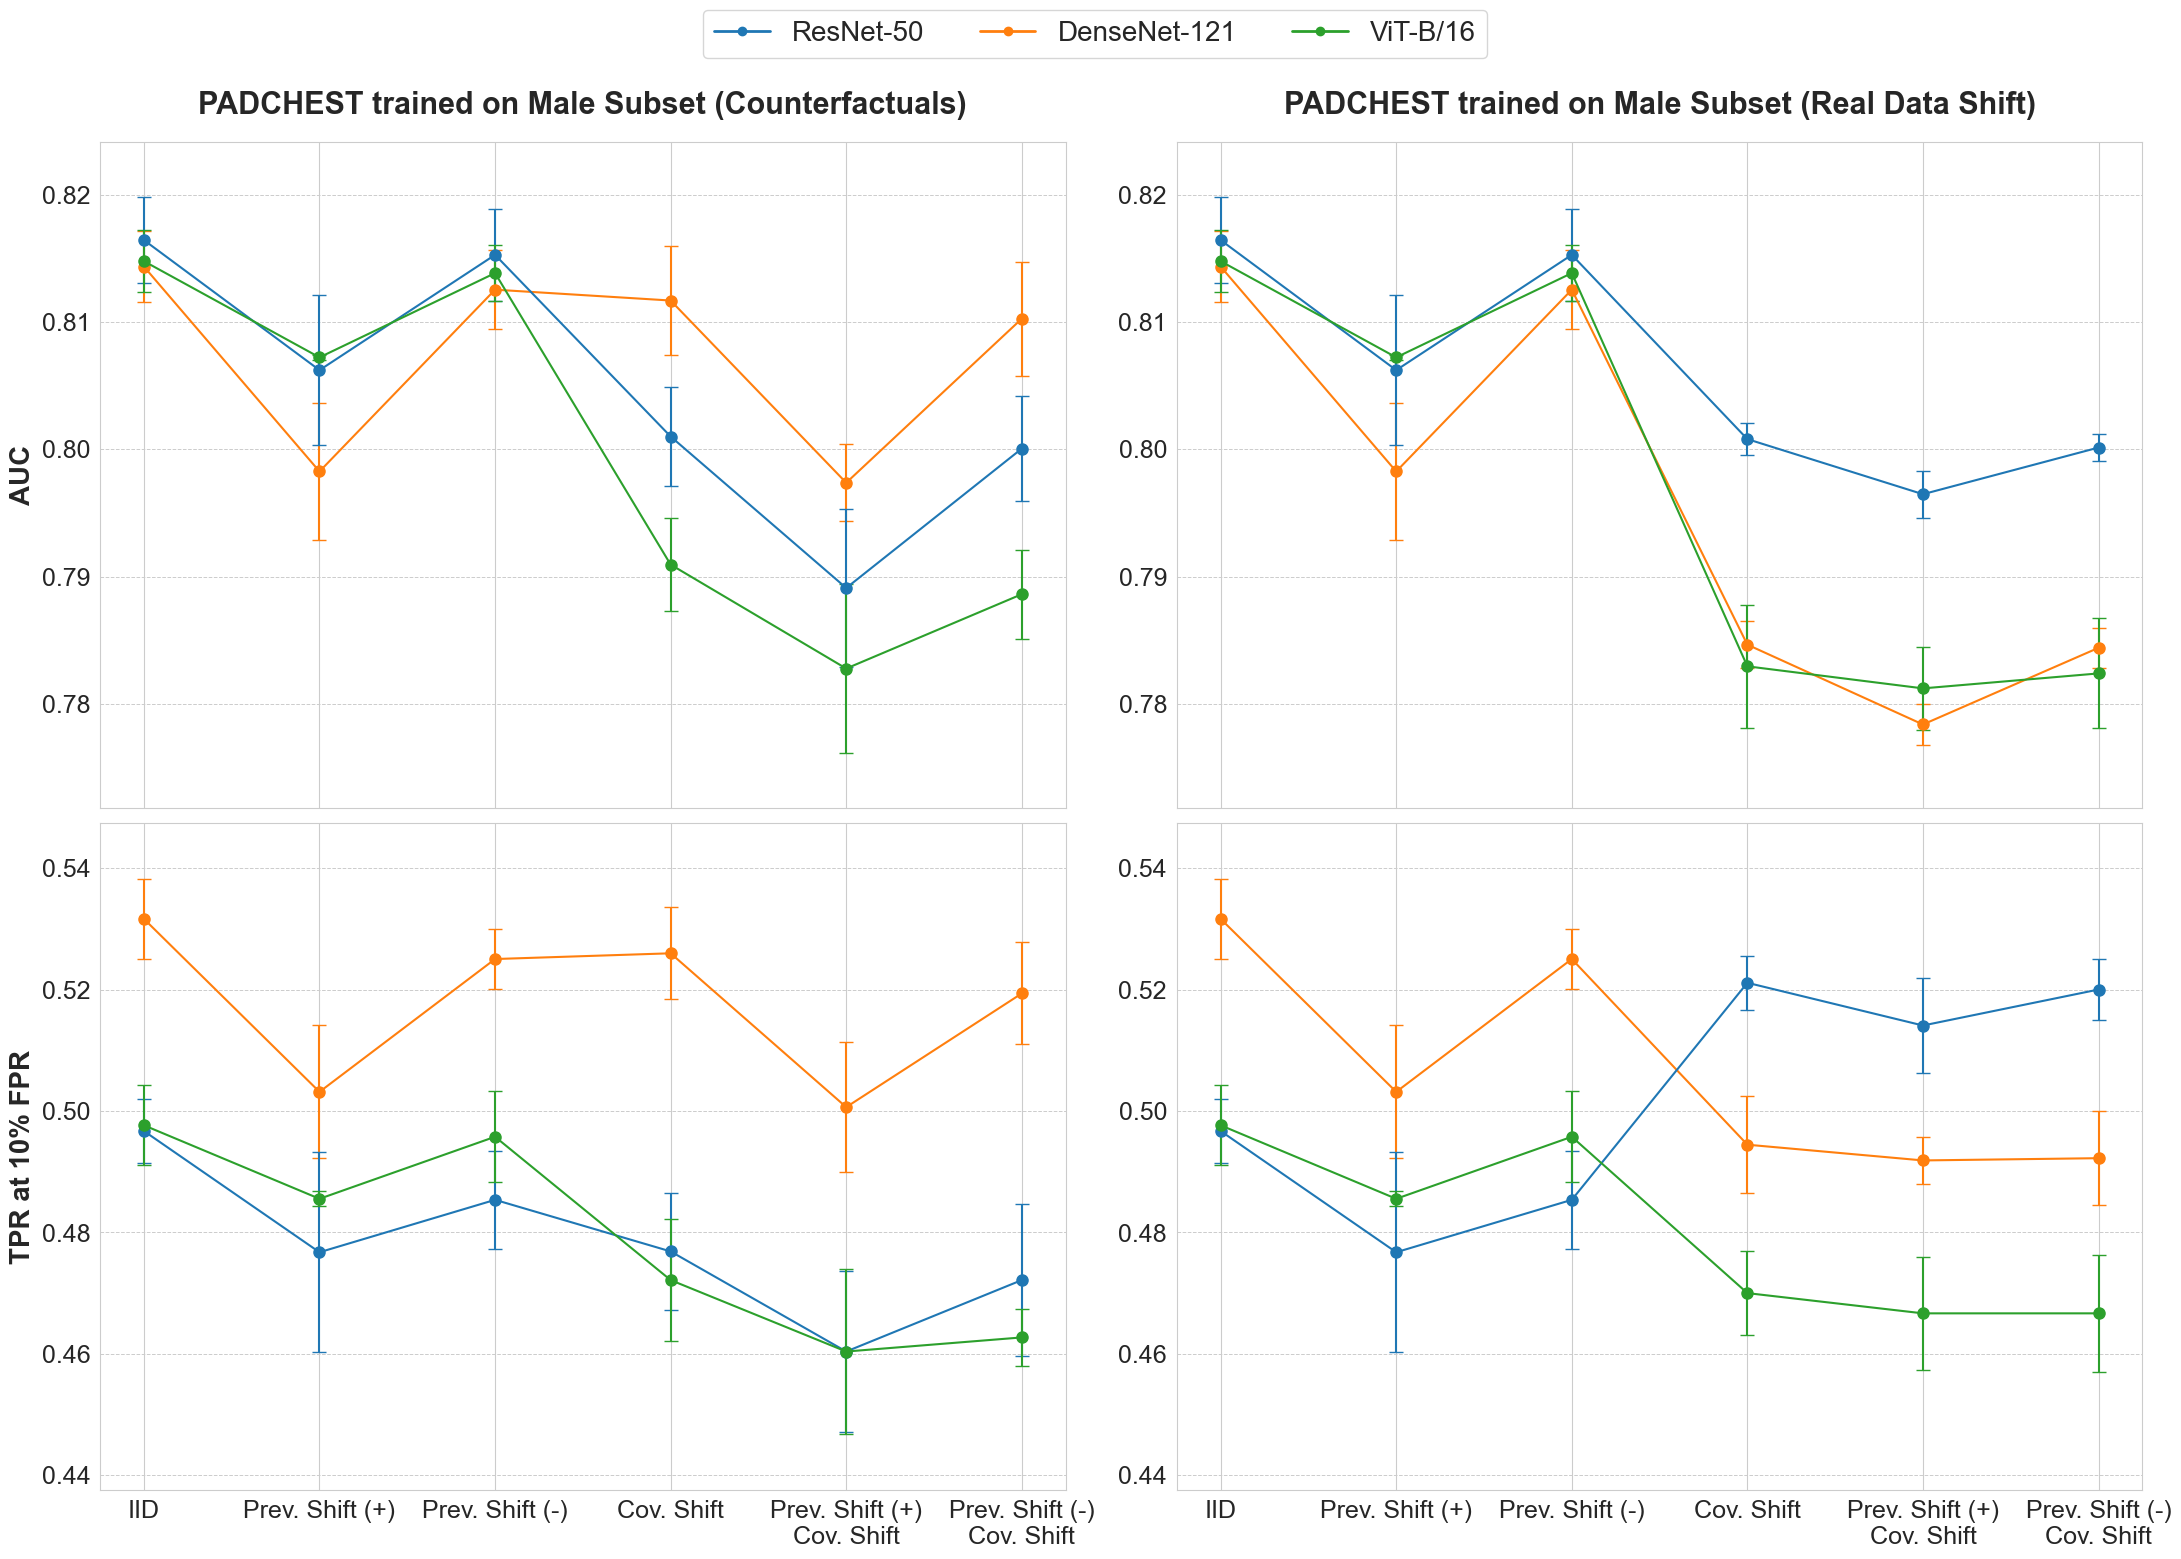

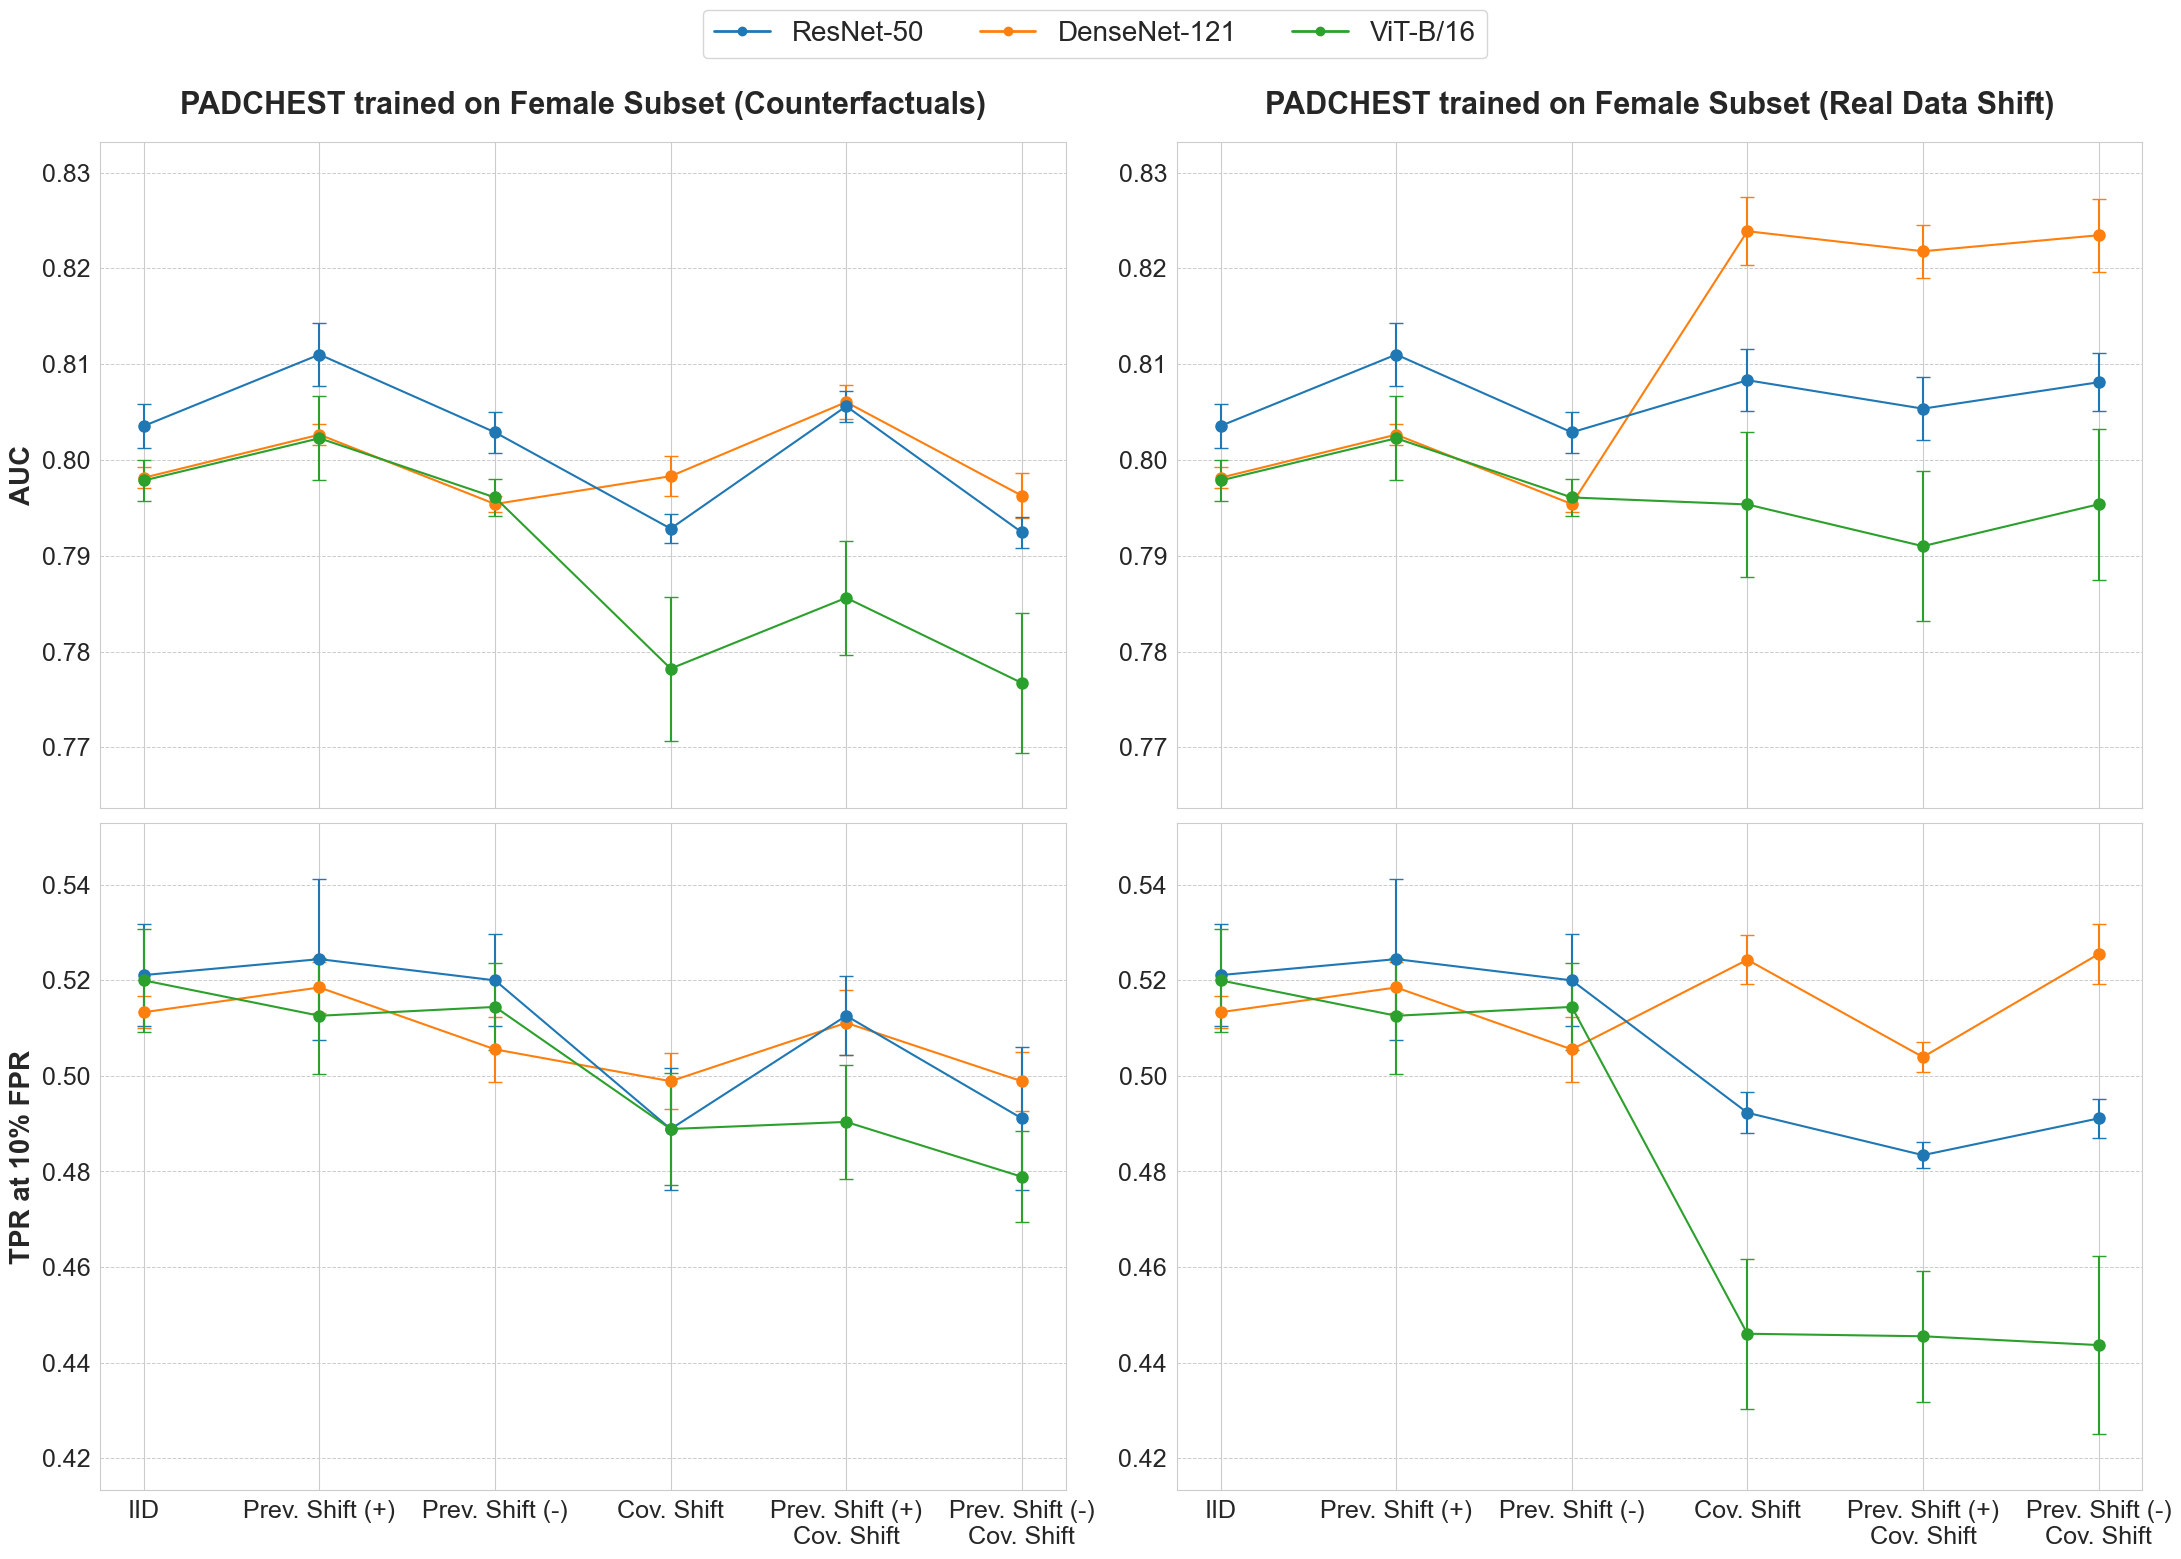

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def plot_stacked_performance(
    dataframe,
    plot1_info,
    plot2_info,
    primary_metric='auc',
    secondary_metric='tpr_at_10%_fpr',
    filename="stacked_model_performance.pdf"
):
    """
    Generates stacked plots of model performance with dynamically adjusted y-axes
    that are shared across each row. Works correctly even with a single sample.

    Args:
        dataframe (pd.DataFrame): The dataframe containing the performance data.
        plot1_info (dict): A dictionary with 'title' and 'conditions' for the left column plots.
        plot2_info (dict): A dictionary with 'title' and 'conditions' for the right column plots.
        primary_metric (str): The primary metric to plot on the top row.
        secondary_metric (str): The secondary metric to plot on the bottom row.
        filename (str): The name of the file to save the plot.
    """
    # --- 1. Setup Figure and Global Settings ---
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(22, 16), sharex=True)
    model_display_map = {'resnet': 'ResNet-50', 'densenet': 'DenseNet-121', 'vit': 'ViT-B/16'}
    colors = {'ResNet-50': 'C0', 'DenseNet-121': 'C1', 'ViT-B/16': 'C2'}
    n_samples = dataframe.groupby('model_type').size()

    # --- 2. Pre-calculate data for ALL plots to find global axis limits ---
    all_plot_data = []
    for plot_info in [plot1_info, plot2_info]:
        conditions = plot_info['conditions']
        primary_cols = {f'{key}_{primary_metric}': name for key, name in conditions.items()}
        secondary_cols = {f'{key}_{secondary_metric}': name for key, name in conditions.items()}

        avg_primary = dataframe.groupby('model_type')[list(primary_cols.keys())].mean().T.rename(index=primary_cols, columns=model_display_map)
      
        sem_primary = dataframe.groupby('model_type')[list(primary_cols.keys())].std().fillna(0).T.rename(index=primary_cols).div(np.sqrt(n_samples), axis='columns').rename(columns=model_display_map)

        avg_secondary = dataframe.groupby('model_type')[list(secondary_cols.keys())].mean().T.rename(index=secondary_cols, columns=model_display_map)
        sem_secondary = dataframe.groupby('model_type')[list(secondary_cols.keys())].std().fillna(0).T.rename(index=secondary_cols).div(np.sqrt(n_samples), axis='columns').rename(columns=model_display_map)
        
        all_plot_data.append({
            'avg_primary': avg_primary, 'sem_primary': sem_primary,
            'avg_secondary': avg_secondary, 'sem_secondary': sem_secondary,
            'title': plot_info['title']
        })

    # --- 3. Calculate Dynamic Y-Axis Limits for each row ---
    min_p = min((d['avg_primary'] - d['sem_primary']).min().min() for d in all_plot_data)
    max_p = max((d['avg_primary'] + d['sem_primary']).max().max() for d in all_plot_data)
    padding_p = (max_p - min_p) * 0.1  # Restore 10% padding for better visualization
    y_lim_primary = (min_p - padding_p, max_p + padding_p)

    min_s = min((d['avg_secondary'] - d['sem_secondary']).min().min() for d in all_plot_data)
    max_s = max((d['avg_secondary'] + d['sem_secondary']).max().max() for d in all_plot_data)
    padding_s = (max_s - min_s) * 0.1 # Restore 10% padding
    y_lim_secondary = (min_s - padding_s, max_s + padding_s)

    # --- 4. Loop through columns and create plots ---
    for i, plot_data in enumerate(all_plot_data):
        ax_primary = axes[0, i]
        ax_secondary = axes[1, i]

        ax_primary.set_ylim(y_lim_primary)
        ax_secondary.set_ylim(y_lim_secondary)

        # Plotting
        for model_name in plot_data['avg_primary'].columns:
            color = colors.get(model_name, 'k')
            ax_primary.errorbar(x=plot_data['avg_primary'].index, y=plot_data['avg_primary'][model_name],
                                yerr=plot_data['sem_primary'][model_name], marker='o', linestyle='-',
                                color=color, markersize=8, capsize=5)
            ax_secondary.errorbar(x=plot_data['avg_secondary'].index, y=plot_data['avg_secondary'][model_name],
                                  yerr=plot_data['sem_secondary'][model_name], marker='o', linestyle='-',
                                  color=color, markersize=8, capsize=5)

  
        ax_primary.set_title(plot_data['title'], fontweight='bold', fontsize=22, pad=20)
        plt.setp(ax_secondary.get_xticklabels(), rotation=0, ha="center", fontsize=18)
        
        for ax in [ax_primary, ax_secondary]:
            ax.tick_params(axis='y', which='major', labelsize=18)
            ax.grid(True, axis='y', linestyle='--', linewidth=0.7)

    # --- 5. Global Figure Formatting ---
    axes[0, 0].set_ylabel(f"{primary_metric.upper()}", fontweight='bold', fontsize=20)
    axes[1, 0].set_ylabel(f"{secondary_metric.upper()}", fontweight='bold', fontsize=20)
    axes[1, 0].set_ylabel(f"TPR at 10% FPR", fontweight='bold', fontsize=20)

    model_legend = [Line2D([0], [0], color=colors[name], marker='o', linestyle='-', lw=2, label=name) for name in model_display_map.values()]
    fig.legend(handles=model_legend, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=20)
    
    fig.tight_layout(rect=[0, 0, 1, 0.93])

    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# --- Parameters and Execution (No changes needed here) ---
datasets = {
    "IDC Scanner" : "25_label_shift_stress_test_Imaging_to_Phillips.csv",
    "Phillips Scanner" : "25_label_shift_stress_test_Phillips_to_Imaging.csv",
    "Male Subset" : "25_label_shift_stress_test_Male_to_Female.csv",
    "Female Subset" : "25_label_shift_stress_test_Female_to_Male.csv",
}

plot1_conditions = {
    'test_a': 'IID', 'shifted_pos': 'Prev. Shift (+)', 'shifted_neg': 'Prev. Shift (-)',
    'cf_a': 'Cov. Shift', 'cf_shifted_pos': 'Prev. Shift (+)\nCov. Shift', 'cf_shifted_neg': 'Prev. Shift (-)\nCov. Shift',
}
plot2_conditions = {
    'test_a': 'IID', 'shifted_pos': 'Prev. Shift (+)', 'shifted_neg': 'Prev. Shift (-)',
    'test_b': 'Cov. Shift', 'test_b_shifted_pos': 'Prev. Shift (+)\nCov. Shift', 'test_b_shifted_neg': 'Prev. Shift (-)\nCov. Shift',
}

for subgroup, filename in datasets.items():
    df = pd.read_csv(filename)
    plot1_info = {'title': f'PADCHEST trained on {subgroup} (Counterfactuals)', 'conditions': plot1_conditions}
    plot2_info = {'title': f'PADCHEST trained on {subgroup} (Real Data Shift)', 'conditions': plot2_conditions}
    plot_stacked_performance(df, plot1_info, plot2_info, filename=f"padchest_stacked_{subgroup.replace(' ', '_')}.pdf")

# Counterfactual Stress Testing on EMBED

In [14]:
embed_df = pd.read_csv("25_label_shift_embed_stress_testing.csv")
embed_df

,model_type,model_name,test_a_accuracy,test_a_auc,test_a_recall,test_a_specificity,test_a_balanced_accuracy,test_a_tpr_at_10_fpr,test_a_tpr_at_20_fpr,shifted_pos_accuracy,...,real_s4_pos_balanced_accuracy,real_s4_pos_tpr_at_10_fpr,real_s4_pos_tpr_at_20_fpr,real_s4_neg_accuracy,real_s4_neg_auc,real_s4_neg_recall,real_s4_neg_specificity,real_s4_neg_balanced_accuracy,real_s4_neg_tpr_at_10_fpr,real_s4_neg_tpr_at_20_fpr
0,resnet,resnet_trained_on_0_split_on_scanner_model_see...,0.7292,0.928010,0.769002,0.903126,0.769002,0.779319,0.896539,0.734101,...,0.683895,0.646143,0.792491,0.561905,0.889115,0.685609,0.860864,0.685609,0.639209,0.792240
1,densenet,densenet_trained_on_0_split_on_scanner_model_s...,0.7412,0.931441,0.770609,0.905805,0.770609,0.789481,0.902349,0.744470,...,0.687361,0.642610,0.828323,0.601190,0.898386,0.691292,0.867872,0.691292,0.657619,0.816683
2,vit,vit_trained_on_0_split_on_scanner_model_seed_3...,0.7318,0.928947,0.771544,0.904363,0.771544,0.790281,0.900550,0.734562,...,0.707483,0.667221,0.808124,0.629762,0.892168,0.710135,0.876821,0.710135,0.677827,0.797454
3,resnet,resnet_trained_on_0_split_on_scanner_model_see...,0.7282,0.932136,0.779150,0.903882,0.779150,0.788932,0.905031,0.726037,...,0.712097,0.675197,0.853594,0.644048,0.899207,0.722871,0.881804,0.722871,0.683806,0.827644
4,densenet,densenet_trained_on_0_split_on_scanner_model_s...,0.7502,0.934023,0.791510,0.910835,0.791510,0.799207,0.904721,0.752074,...,0.689172,0.666882,0.823101,0.620238,0.896734,0.697107,0.877716,0.697107,0.667290,0.811195
5,vit,vit_trained_on_0_split_on_scanner_model_seed_3...,0.7370,0.925956,0.746437,0.903330,0.746437,0.773748,0.889439,0.738940,...,0.701876,0.680963,0.836707,0.682143,0.895841,0.706391,0.888841,0.706391,0.673048,0.810055
6,resnet,resnet_trained_on_0_split_on_scanner_model_see...,0.7400,0.928400,0.771567,0.906065,0.771567,0.779133,0.899100,0.736866,...,0.709120,0.683333,0.846371,0.666667,0.903152,0.719063,0.888368,0.719063,0.682644,0.839406
7,densenet,densenet_trained_on_0_split_on_scanner_model_s...,0.7352,0.932672,0.786101,0.906627,0.786101,0.792254,0.904327,0.734793,...,0.680229,0.664254,0.823083,0.608333,0.893052,0.680126,0.873280,0.680126,0.654022,0.814940


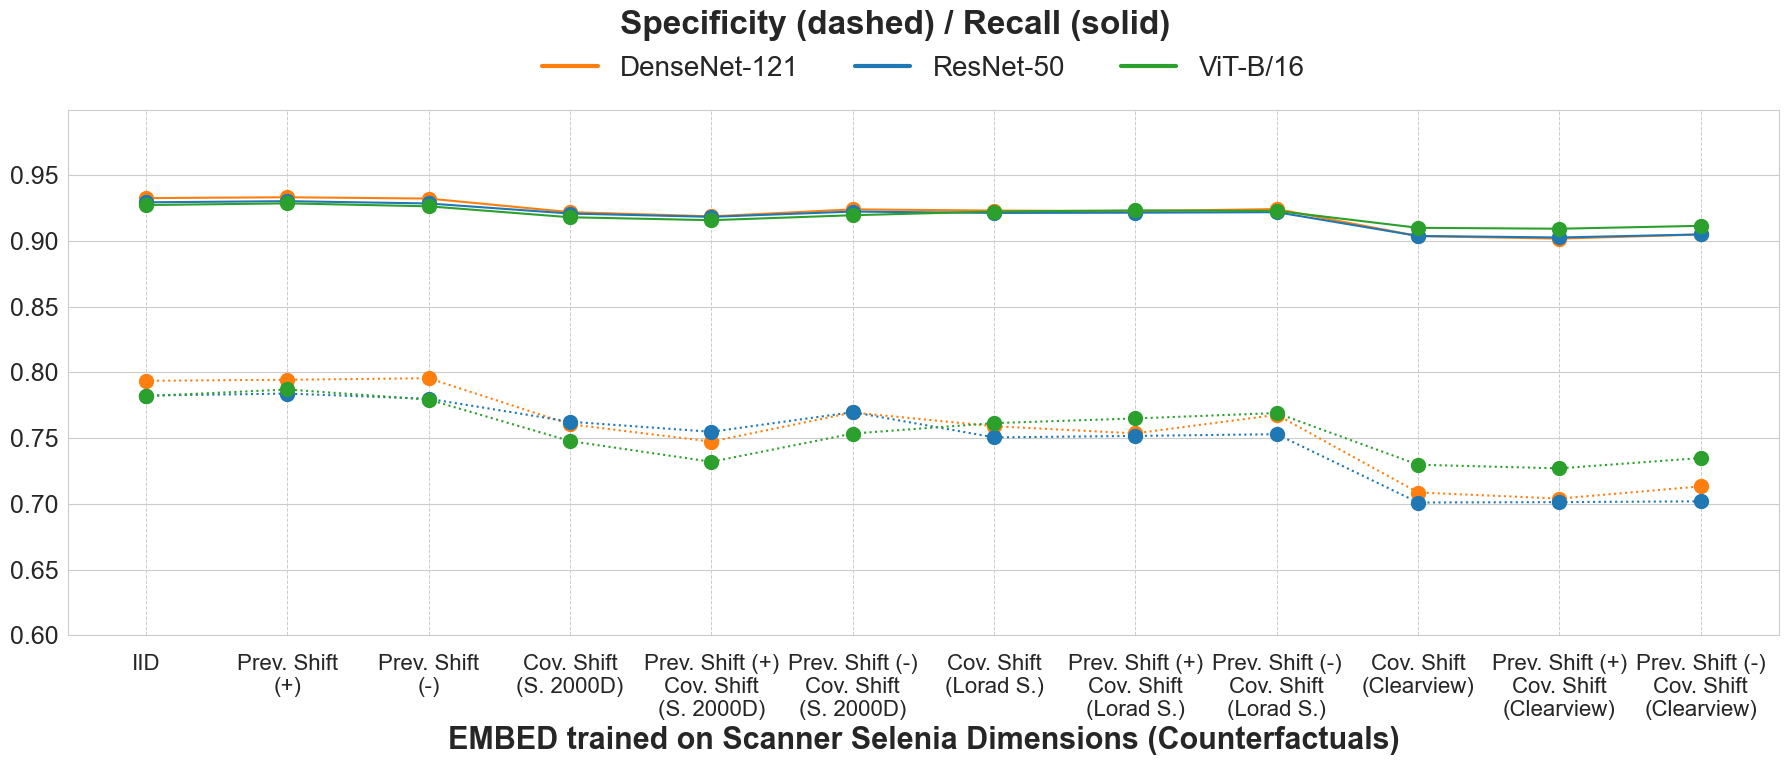

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib.lines import Line2D
import numpy as np

# --- 2. Define Plotting Function ---
def plot_embed_performance(dataframe, primary_metric='auc', secondary_metric='accuracy', title_extra='trained on Scanner 0'):
    """
    Calculates and plots average performance for the EMBED dataset evaluation.
    """
    # Define mappings for plot labels
    model_display_map = {'resnet': 'ResNet-50', 'densenet': 'DenseNet-121', 'vit': 'ViT-B/16'}
    scanner_name_map = {2: "S. 2000D", 3: "Lorad S.", 4: "Clearview"}

    # --- Dynamically create the column-to-label mapping ---
    conditions = {
        'test_a': 'IID',
        'shifted_neg': 'Prev. Shift\n(+)',
        'shifted_pos': 'Prev. Shift\n(-)',
    }
    
    # Add covariate and combined shifts for each counterfactual scanner
    base_sets = {'a': 'Cov. Shift',
                  'shifted_neg': 'Prev. Shift (+)\nCov. Shift',
                    'shifted_pos': 'Prev. Shift (-)\nCov. Shift'
                   }
    for scanner_id, scanner_name in scanner_name_map.items():
        for base_key, prefix in base_sets.items():
            col_key = f'cf_{base_key}_s{scanner_id}'
            label = f"{prefix}\n({scanner_name})"
            conditions[col_key] = label
            
    # --- Data Preparation ---
    primary_cols = {f'{key}_{primary_metric}': name for key, name in conditions.items()}
    secondary_cols = {f'{key}_{secondary_metric}': name for key, name in conditions.items()}

    existing_primary = [col for col in primary_cols if col in dataframe.columns]
    existing_secondary = [col for col in secondary_cols if col in dataframe.columns]
    
    avg_primary = dataframe.groupby('model_type')[existing_primary].mean().T.rename(index=primary_cols, columns=model_display_map)
    avg_secondary = dataframe.groupby('model_type')[existing_secondary].mean().T.rename(index=secondary_cols, columns=model_display_map)
    
    # --- Plotting ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 8)) # Wider figure for more labels
    
    colors = {'ResNet-50': 'C0', 'DenseNet-121': 'C1', 'ViT-B/16': 'C2'}

    for model_name in avg_primary.columns:
        color = colors.get(model_name, 'k')
        ax.plot(avg_primary.index, avg_primary[model_name], marker='o', linestyle='-', color=color, markersize=10)
        ax.plot(avg_secondary.index, avg_secondary[model_name], marker='o', linestyle=':', color=color, markersize=10)
        
    # --- Formatting the Plot ---
    ax.set_xlabel(f'EMBED trained on Scanner Selenia Dimensions (Counterfactuals)', fontweight='bold', fontsize=22)
    ax.tick_params(axis='x', which='major', labelsize=16, rotation=0, pad=10)
    ax.tick_params(axis='y', which='major', labelsize=18)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.7)
    ax.set_ylim(0.6, 1.0)
    ax.set_yticks(np.arange(0.6, 1.0, 0.05))

    # --- Custom Legend ---
    legend_elements = [Line2D([0], [0], color=colors[name], lw=3, label=name) for name in avg_primary.columns]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=20, frameon=False)
    fig.suptitle('Specificity (dashed) / Recall (solid)', fontsize=24, fontweight='bold', y=0.95)

    fig.tight_layout()
    plt.savefig(f"embed_performance_counterfactuals_{primary_metric}_vs_{secondary_metric}.pdf", bbox_inches='tight')
    plt.show()

# --- 3. Run the Analysis ---
plot_embed_performance(embed_df, primary_metric='auc', secondary_metric='tpr_at_10_fpr')


[0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


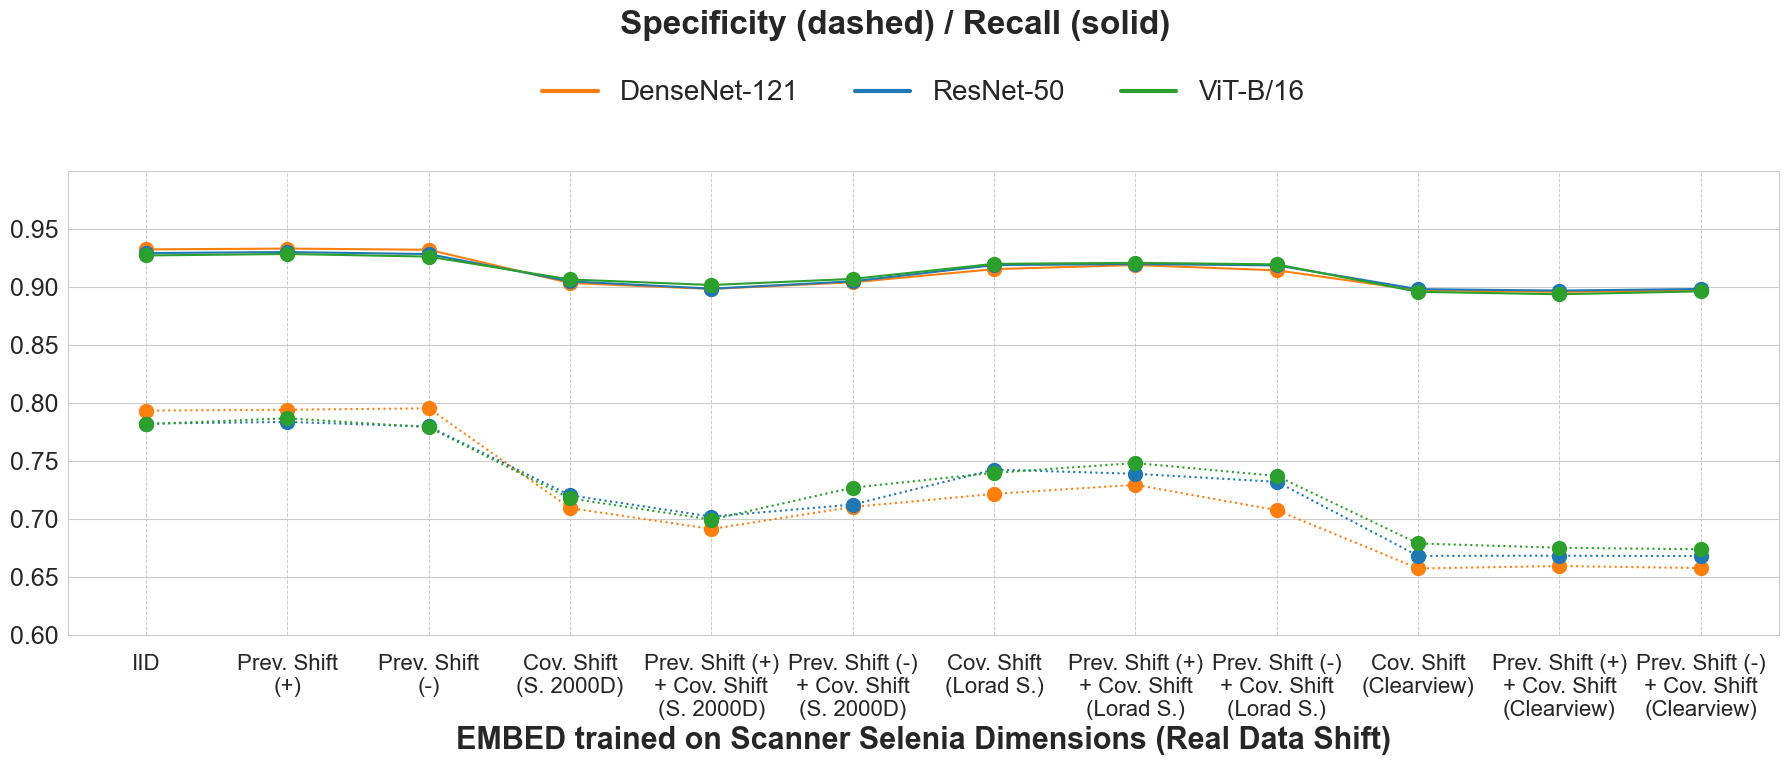

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np
def plot_embed_performance_real_data(dataframe, primary_metric='auc', secondary_metric='accuracy'):
    """
    Calculates and plots average performance for the EMBED dataset evaluation
    using the REAL data shifts (undersampled to match IID distribution).
    This version is adapted from the original 'cf' plotting script.
    """
    # --- Define mappings for plot labels ---
    model_display_map = {'resnet': 'ResNet-50', 'densenet': 'DenseNet-121', 'vit': 'ViT-B/16'}
    scanner_name_map = {2: "S. 2000D", 3: "Lorad S.", 4: "Clearview"}

    # --- Dynamically create the column-to-label mapping ---

    conditions = {
        'test_a': 'IID',
        'shifted_neg': 'Prev. Shift\n(+)',
        'shifted_pos': 'Prev. Shift\n(-)',
    }
    
  
    base_sets = {
        '': 'Cov. Shift',
        '_neg': 'Prev. Shift (+)\n+ Cov. Shift',
        '_pos': 'Prev. Shift (-)\n+ Cov. Shift'
    }
    for scanner_id, scanner_name in scanner_name_map.items():
        for suffix, prefix in base_sets.items():
            # Creates keys like 'real_s2', 'real_s2_neg', 'real_s2_pos'
            col_key = f'real_s{scanner_id}{suffix}'
            label = f"{prefix}\n({scanner_name})"
            conditions[col_key] = label
            
    # --- Data Preparation ---
    primary_cols = {f'{key}_{primary_metric}': name for key, name in conditions.items()}
    secondary_cols = {f'{key}_{secondary_metric}': name for key, name in conditions.items()}

    existing_primary = [col for col in primary_cols if col in dataframe.columns]
    existing_secondary = [col for col in secondary_cols if col in dataframe.columns]
    
    if not existing_primary:
        print(f"Warning: No columns matching primary metric '{primary_metric}' found for the real data plot. Check your results CSV for columns like 'real_s2_auc', etc.")
        return

    avg_primary = dataframe.groupby('model_type')[existing_primary].mean().T.rename(index=primary_cols, columns=model_display_map)
    avg_secondary = dataframe.groupby('model_type')[existing_secondary].mean().T.rename(index=secondary_cols, columns=model_display_map)
    
    # --- Plotting ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 8))
    
    colors = {'ResNet-50': 'C0', 'DenseNet-121': 'C1', 'ViT-B/16': 'C2'}

    for model_name in avg_primary.columns:
        color = colors.get(model_name, 'k')
        ax.plot(avg_primary.index, avg_primary[model_name], marker='o', linestyle='-', color=color, markersize=10)
        ax.plot(avg_secondary.index, avg_secondary[model_name], marker='o', linestyle=':', color=color, markersize=10)
        
    # --- Formatting the Plot ---
    ax.set_xlabel(f'EMBED trained on Scanner Selenia Dimensions (Real Data Shift)', fontweight='bold', fontsize=22)
    ax.tick_params(axis='x', which='major', labelsize=16, rotation=0, pad=10)
    ax.tick_params(axis='y', which='major', labelsize=18)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.7)
    ax.set_ylim(0.6, 1.0)
    ax.set_yticks(np.arange(0.6, 1.0, 0.05))
    print(np.arange(0.55, 1.05, 0.05))
    # --- Custom Legend ---
    legend_elements = [Line2D([0], [0], color=colors[name], lw=3, label=name) for name in avg_primary.columns]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=20, frameon=False)
    fig.suptitle('Specificity (dashed) / Recall (solid)', fontsize=24, fontweight='bold', y=0.95)

    fig.tight_layout()
    plt.savefig(f"embed_performance_real_data_{primary_metric}_vs_{secondary_metric}.pdf", bbox_inches='tight')
    plt.show()


plot_embed_performance_real_data(embed_df, primary_metric='auc', secondary_metric='tpr_at_10_fpr')
